# Avocado Data Analysis Notebook
ALT-TAB LABS LLP &copy; 2020 All Rights Reserved

In [7]:
# load csvs
import pandas as pd
df_train = pd.read_csv('avocado.csv', index_col='id')

In [8]:
# Clean Data

# Drops missing values 
df_train = df_train.dropna(axis=0)

# Convert strings to numbers
types = {'conventional': 0, 'organic': 1}
df_train.type = [types[x] for x in df_train.type]
regions = df_train.region.unique()
regionDict = {}
id=1
for region in regions:
    regionDict[region] = id
    id+=1
print(regionDict)
df_train.region = [regionDict[x] for x in df_train.region]

# Read more advanced ways to clean data
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn

{'Albany': 1, 'Atlanta': 2, 'BaltimoreWashington': 3, 'Boise': 4, 'Boston': 5, 'BuffaloRochester': 6, 'California': 7, 'Charlotte': 8, 'Chicago': 9, 'CincinnatiDayton': 10, 'Columbus': 11, 'DallasFtWorth': 12, 'Denver': 13, 'Detroit': 14, 'GrandRapids': 15, 'GreatLakes': 16, 'HarrisburgScranton': 17, 'HartfordSpringfield': 18, 'Houston': 19, 'Indianapolis': 20, 'Jacksonville': 21, 'LasVegas': 22, 'LosAngeles': 23, 'Louisville': 24, 'MiamiFtLauderdale': 25, 'Midsouth': 26, 'Nashville': 27, 'NewOrleansMobile': 28, 'NewYork': 29, 'Northeast': 30, 'NorthernNewEngland': 31, 'Orlando': 32, 'Philadelphia': 33, 'PhoenixTucson': 34, 'Pittsburgh': 35, 'Plains': 36, 'Portland': 37, 'RaleighGreensboro': 38, 'RichmondNorfolk': 39, 'Roanoke': 40, 'Sacramento': 41, 'SanDiego': 42, 'SanFrancisco': 43, 'Seattle': 44, 'SouthCarolina': 45, 'SouthCentral': 46, 'Southeast': 47, 'Spokane': 48, 'StLouis': 49, 'Syracuse': 50, 'Tampa': 51, 'TotalUS': 52, 'West': 53, 'WestTexNewMexico': 54}


In [9]:
# Select data for learning
# features = ['DataBatch','TotalVolume','4046','4225','4770','TotalBags','SmallBags','LargeBags','type','region', 'year', 'month', 'day']
features = ['Date','TotalVolume','4046','4225','4770','TotalBags','SmallBags','LargeBags','type', 'region']
target = 'AveragePrice'

def clean_date(x):
    return x.replace('-','')

X = df_train[features]
X['Date'] = X['Date'].apply(clean_date)
y = df_train[target]

C:\Users\alien\AppData\Local\Temp\ipykernel_39096\3218312184.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Date'] = X['Date'].apply(clean_date)


In [10]:
print(len(X.columns))

10


# Regression Time!

In [13]:
# Sci Kit Learn! Scientific Computing library for python
from sklearn import *
# Pick the regression model we want to use

# Random Forest Regression
model1 = ensemble.ExtraTreesRegressor(random_state=2022, n_estimators=5000, criterion='squared_error', verbose=1, n_jobs=16)  # 931
model2 = ensemble.GradientBoostingRegressor(random_state=2022, n_estimators=3000, verbose=1, criterion='squared_error')  # 9107
model3 = ensemble.RandomForestRegressor(n_estimators=3000, criterion='squared_error', n_jobs=16, verbose=1)  # 9145
model4 = ensemble.HistGradientBoostingRegressor(loss='squared_error', max_iter=10000, early_stopping=False, scoring='r2', verbose=1, categorical_features=[8, 9], max_leaf_nodes=26)  #9429

# model = ensemble.AdaBoostRegressor(base_estimator=model, n_estimators=10)

In [14]:
# Perform regression on the data
model1.fit(X, y)
# model2.fit(X, y)
# model3.fit(X, y)
model4.fit(X, y)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    2.2s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    3.4s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    5.0s
[Parallel(n_jobs=16)]: Done 2418 tasks      | elapsed:    6.8s
[Parallel(n_jobs=16)]: Done 3168 tasks      | elapsed:    8.9s
[Parallel(n_jobs=16)]: Done 4018 tasks      | elapsed:   11.3s


Binning 0.001 GB of training data: 0.013 s
Fitting gradient boosted rounds:
[1/10000] 1 tree, 26 leaves, max depth = 7, in 0.005s
[2/10000] 1 tree, 26 leaves, max depth = 6, in 0.004s
[3/10000] 1 tree, 26 leaves, max depth = 7, in 0.005s
[4/10000] 1 tree, 26 leaves, max depth = 6, in 0.004s
[5/10000] 1 tree, 26 leaves, max depth = 7, in 0.005s
[6/10000] 1 tree, 26 leaves, max depth = 8, in 0.005s
[7/10000] 1 tree, 26 leaves, max depth = 8, in 0.004s
[8/10000] 1 tree, 26 leaves, max depth = 8, in 0.004s
[9/10000] 1 tree, 26 leaves, max depth = 8, in 0.005s
[10/10000] 1 tree, 26 leaves, max depth = 7, in 0.005s
[11/10000] 1 tree, 26 leaves, max depth = 7, in 0.004s
[12/10000] 1 tree, 26 leaves, max depth = 9, in 0.005s
[13/10000] 1 tree, 26 leaves, max depth = 9, in 0.004s
[14/10000] 1 tree, 26 leaves, max depth = 7, in 0.004s
[15/10000] 1 tree, 26 leaves, max depth = 8, in 0.004s
[16/10000] 1 tree, 26 leaves, max depth = 8, in 0.005s
[17/10000] 1 tree, 26 leaves, max depth = 7, in 0.004

[Parallel(n_jobs=16)]: Done 4968 tasks      | elapsed:   14.1s
[Parallel(n_jobs=16)]: Done 5000 out of 5000 | elapsed:   14.1s finished


1 tree, 26 leaves, max depth = 7, in 0.004s
[20/10000] 1 tree, 26 leaves, max depth = 6, in 0.005s
[21/10000] 1 tree, 26 leaves, max depth = 7, in 0.005s
[22/10000] 1 tree, 26 leaves, max depth = 8, in 0.004s
[23/10000] 1 tree, 26 leaves, max depth = 7, in 0.005s
[24/10000] 1 tree, 26 leaves, max depth = 6, in 0.004s
[25/10000] 1 tree, 26 leaves, max depth = 8, in 0.005s
[26/10000] 1 tree, 26 leaves, max depth = 8, in 0.005s
[27/10000] 1 tree, 26 leaves, max depth = 10, in 0.005s
[28/10000] 1 tree, 26 leaves, max depth = 8, in 0.004s
[29/10000] 1 tree, 26 leaves, max depth = 8, in 0.004s
[30/10000] 1 tree, 26 leaves, max depth = 9, in 0.004s
[31/10000] 1 tree, 26 leaves, max depth = 7, in 0.004s
[32/10000] 1 tree, 26 leaves, max depth = 7, in 0.004s
[33/10000] 1 tree, 26 leaves, max depth = 9, in 0.004s
[34/10000] 1 tree, 26 leaves, max depth = 9, in 0.004s
[35/10000] 1 tree, 26 leaves, max depth = 8, in 0.004s
[36/10000] 1 tree, 26 leaves, max depth = 6, in 0.004s
[37/10000] 1 tree, 2

HistGradientBoostingRegressor(categorical_features=[8, 9], early_stopping=False,
                              max_iter=10000, max_leaf_nodes=26, verbose=1)

# Predict for Testing data

In [15]:
df_test = pd.read_csv('avocado-test.csv', index_col='id')
# Clean Data

# Drops missing values
df_test = df_test.dropna(axis=0)

# Convert strings to numbers
types = {'conventional': 0, 'organic': 1}
df_test.type = [types[x] for x in df_test.type]
regions = df_test.region.unique()
for region in regions:
    if region not in regionDict.keys():
        regionDict[region] = 0
df_test.region = [regionDict[x] for x in df_test.region]
# Read more advanced ways to clean data
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn

In [16]:
# Select features
XforPredictions = df_test[features]
XforPredictions['Date'] = XforPredictions['Date'].apply(clean_date)
XforPredictions.head()

C:\Users\alien\AppData\Local\Temp\ipykernel_39096\3326796154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XforPredictions['Date'] = XforPredictions['Date'].apply(clean_date)


,Date,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,type,region
id,,,,,,,,,,
0,20160731,28969.34,80.77,27361.91,0.00,1526.66,1526.66,0.00,1,9
1,20170820,322962.89,5632.85,242365.82,2441.56,72522.66,22942.48,46083.51,0,31
2,20170122,155334.45,3657.79,74068.65,0.00,77608.01,27302.29,50305.72,1,16
3,20151004,10231.74,341.89,8519.00,0.00,1370.85,303.33,1067.52,1,10
4,20151018,10652.02,6905.95,39.52,0.00,3706.55,3706.55,0.00,1,19


In [17]:
# Make Predictions!
import numpy as np
yPredictions1 = model1.predict(XforPredictions)
yPredictions4 = model4.predict(XforPredictions)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 2418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 3168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 4018 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 4968 tasks      | elapsed:    0.6s
[Parallel(n_jobs=16)]: Done 5000 out of 5000 | elapsed:    0.6s finished


Predictions: [2.10125206 1.81956946 1.19214626 ... 1.4143938  2.05799404 1.5610265 ]


(array([  81.,  563., 1359., 1262., 1116.,  667.,  273.,  105.,   32.,
          17.]),
 array([0.44056386, 0.69972204, 0.95888022, 1.2180384 , 1.47719658,
        1.73635476, 1.99551294, 2.25467112, 2.51382931, 2.77298749,
        3.03214567]),
 <BarContainer object of 10 artists>)

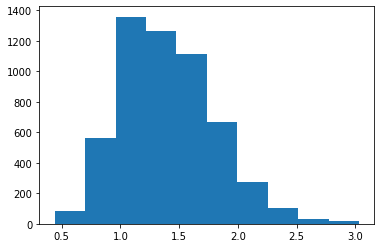

In [18]:
# Ensembling
# yPredictions = np.mean([yPredictions1, yPredictions4], axis=0)
yPredictions = yPredictions1 * 0.15 + yPredictions4 * 0.85
print("Predictions:", yPredictions)
import matplotlib.pyplot as plt
plt.hist(yPredictions)

In [19]:
# Save to CSV File!
output = pd.DataFrame({'id': XforPredictions.index, 'AveragePrice': yPredictions})
output.to_csv('avocado-submission.csv', index=False)
print(output)

        id  AveragePrice
0        0      2.101252
1        1      1.819569
2        2      1.192146
3        3      1.533623
4        4      1.483611
...    ...           ...
5470  5470      1.639420
5471  5471      1.259813
5472  5472      1.414394
5473  5473      2.057994
5474  5474      1.561027

[5475 rows x 2 columns]


In [76]:
# Make Predictions!
import numpy as np
yPredictions1 = model1.predict(XforPredictions) #TODO TODO TODO TODO TODO TODO TODO TODO
yPredictions4 = model4.predict(XforPredictions) #TODO TODO TODO TODO TODO TODO TODO TODO

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 2418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 3168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 4000 out of 4000 | elapsed:    0.4s finished


Predictions: [2.012291   1.7080887  1.21093556 ... 1.58768202 1.82278366 1.58871122]


(array([  69.,  516., 1279., 1208., 1125.,  780.,  306.,  130.,   43.,
          19.]),
 array([0.46455727, 0.70897799, 0.95339872, 1.19781944, 1.44224017,
        1.68666089, 1.93108162, 2.17550234, 2.41992307, 2.66434379,
        2.90876452]),
 <BarContainer object of 10 artists>)

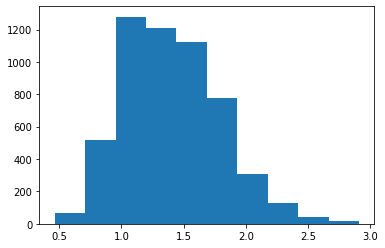

In [107]:
# Ensembling
# yPredictions = np.mean([yPredictions1, yPredictions4], axis=0)
yPredictions = yPredictions1 * 0.15 + yPredictions4 * 0.85
print("Predictions:", yPredictions)
import matplotlib.pyplot as plt
plt.hist(yPredictions)

In [22]:
# Connect to graders
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, 'C:/Users/alien/Documents/PyCharm Projects/Cyberthon 2021/pyctfsglib.py')
import pyctfsglib as ctfsg
import random

USER_TOKEN = "WrlLCkymxwtgFwRHZsdmKfSwcdqIpnqoXEtRkciVRZJfBJUgcEJoxVZjNTQRdqkR" # You need to fill this up
GRADER_URL = random.choice([
  "http://chals.cyberthon22t.ctf.sg:50101/",
  "http://chals.cyberthon22t.ctf.sg:50102/"
])

grader = ctfsg.DSGraderClient(GRADER_URL, USER_TOKEN)
grader.submitFile('avocado-submission.csv')

DSGraderClient: Successfully Connected!
[SERVER] MOTD: CHECK your USER_TOKEN and GRADER_URL HTTP address! I'm AVOCADO_PRICE @2fdeafc926c9
ProofOfWork Challenge =>  ('CTFSGRB881d6de1b6a9f1f569a104592648a36b', 22)
ProofOfWork Answer Found! =>  195131


'{"challenge":{"name":"Avocado Pricing"},"id":"cl21zwz0ac7pg0827fkc2ew6t","status":"PARTIALLY_CORRECT","multiplier":0.9999,"submittedBy":{"username":"hci-69"},"createdAt":"2022-04-16T15:10:01Z"}'

In [23]:
# Download CTFSG Grader Libraries
import urllib.request, os
urllib.request.urlretrieve('https://raw.githubusercontent.com/alttablabs/ctfsg-utils/master/pyctfsglib.py', './pyctfsglib.py')
print('Downloaded pyctfsglib.py:', 'pyctfsglib.py' in os.listdir())

Downloaded pyctfsglib.py: True


In [46]:
# Connect to graders
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, 'C:/Users/alien/Documents/PyCharm Projects/Cyberthon 2021/pyctfsglib.py')
import pyctfsglib as ctfsg
import random

USER_TOKEN = "WrlLCkymxwtgFwRHZsdmKfSwcdqIpnqoXEtRkciVRZJfBJUgcEJoxVZjNTQRdqkR" # You need to fill this up
GRADER_URL = random.choice([
  "http://chals.cyberthon22t.ctf.sg:50101/",
  "http://chals.cyberthon22t.ctf.sg:50102/"
])

grader = ctfsg.DSGraderClient(GRADER_URL, USER_TOKEN)

DSGraderClient: Successfully Connected!
[SERVER] MOTD: CHECK your USER_TOKEN and GRADER_URL HTTP address! I'm AVOCADO_PRICE @366389bec30e


In [109]:
grader.submitFile('avocado-submission.csv')

ProofOfWork Challenge =>  ('CTFSGRB72dbc1ed6dfdb3a9f11f0dca0f62e52a', 22)
ProofOfWork Answer Found! =>  5025952


'{"challenge":{"name":"Avocado Pricing"},"id":"cl21l1y55b3ra0827ex7yqmko","status":"PARTIALLY_CORRECT","multiplier":0.9568,"submittedBy":{"username":"hci-69"},"createdAt":"2022-04-16T08:13:59Z"}'